In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import seaborn as sns

from scipy.stats import ttest_rel, pearsonr
from PIL import Image

### RGB boxplots analysis

In [3]:
images_metadata_dataframe = pd.read_csv("./images_metadata.csv")

In [3]:
def get_500_image_filepaths_randomly(path="../../VOCdevkit/VOC2012/JPEGImages/*.jpg"):
    """Get 500 image filepaths randomly from voc dataset
    
    parameters:
        path: (string) -- path contaning all images
    
    return:
        the_500_image_filepaths -- a list contaning each image's file path
    """
    np.random.seed(7)
    images_filepath = [image for image in glob.glob(path)]
    np.random.shuffle(images_filepath)
    the_500_image_filepaths = images_filepath[:500]
    return the_500_image_filepaths

In [4]:
def get_images_rgb_average_pixel_matrix_dataframe(image_paths):
    """Get rgb average pixels of images 
    
    parameters:
        image_paths: (list) -- path contaning image file paths
    
    return:
        dataframe -- a dataframe whose shape is (len(image_paths), 3) with columns R, G, B 
        which shows the average pixels of rgb from an image
    """
    num = len(image_paths) 
    images_rgb_average_pixel_matrix = np.zeros([num,3])
    for i in range(num):
        image = plt.imread(image_paths[i])
        dims = np.shape(image)
        pixel_matrix = np.reshape(image, (dims[0] * dims[1], dims[2]))
        images_rgb_average_pixel_matrix[i][0] = pixel_matrix[:, 0].mean() # R pixel average
        images_rgb_average_pixel_matrix[i][1] = pixel_matrix[:, 1].mean() # G pixel average
        images_rgb_average_pixel_matrix[i][2] = pixel_matrix[:, 2].mean() # B pixel average
    return pd.DataFrame(images_rgb_average_pixel_matrix, columns=["R", "G", "B"])

In [5]:
the_500_image_filepaths = get_500_image_filepaths_randomly()
image_channels_average_pixel_matrix_df = get_images_rgb_average_pixel_matrix_dataframe(the_500_image_filepaths)

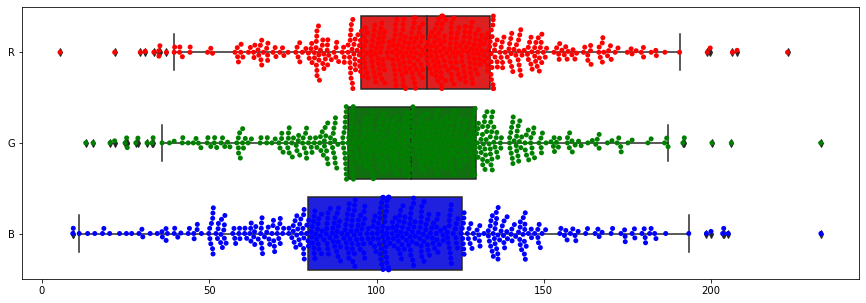

In [6]:
def show_rgb_boxplot(df):
    """
    parameters:
        df: (dataframe) -- columns(R, G, B)
    
    return:
        None
    """
    plt.figure(figsize=(15, 5))
    colors = ["red", "green", "blue"]
    sns.set_palette(sns.color_palette(colors))
    sns.boxplot(data=df, orient="h")
    sns.swarmplot(data=df, orient="h")
show_rgb_boxplot(image_channels_average_pixel_matrix_df)

### T-test on RGB samples

In [7]:
print(ttest_rel(image_channels_average_pixel_matrix_df.R, image_channels_average_pixel_matrix_df.G, alternative="greater"))
print(ttest_rel(image_channels_average_pixel_matrix_df.G, image_channels_average_pixel_matrix_df.B, alternative="greater"))

Ttest_relResult(statistic=6.471601817069001, pvalue=1.1600657288454525e-10)
Ttest_relResult(statistic=9.947565662859931, pvalue=1.0850686807487075e-21)


### RGB correlation

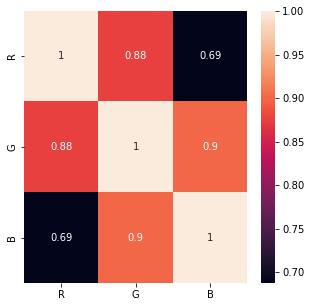

In [8]:
def show_rgb_correlation(df):
    """
    parameters:
        df: (dataframe) -- columns(R, G, B)
    
    return:
        None
    """
    plt.figure(figsize=(5, 5))
    sns.heatmap(df.corr(), annot=True)
show_rgb_correlation(image_channels_average_pixel_matrix_df)

### Pearson correlation coefficient and p-value for testing RGB non-correlation

In [9]:
print(pearsonr(image_channels_average_pixel_matrix_df.R, image_channels_average_pixel_matrix_df.G))
print(pearsonr(image_channels_average_pixel_matrix_df.R, image_channels_average_pixel_matrix_df.B))
print(pearsonr(image_channels_average_pixel_matrix_df.G, image_channels_average_pixel_matrix_df.B))

(0.8753947875489737, 2.5074869242720047e-159)
(0.6879322236192402, 2.4773020529234703e-71)
(0.9010295372923461, 8.857051737760841e-183)


### Find the lightest, darkest, and common light images

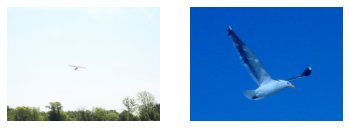

In [10]:
def compare_light_and_dark_images(df, image_paths):
    """
    parameters:
        df: (dataframe) -- columns(R, G, B)
        image_paths: (list) -- path contaning image file paths
    
    return:
        None
    """
    max_index = np.argmax(df["R"])
    min_index = np.argmin(df["R"])
    max_pixels_image = plt.imread(image_paths[max_index])
    min_pixels_image = plt.imread(image_paths[min_index])
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(max_pixels_image)
    ax1.axis('off')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(min_pixels_image)
    ax2.axis('off')
compare_light_and_dark_images(image_channels_average_pixel_matrix_df, the_500_image_filepaths)

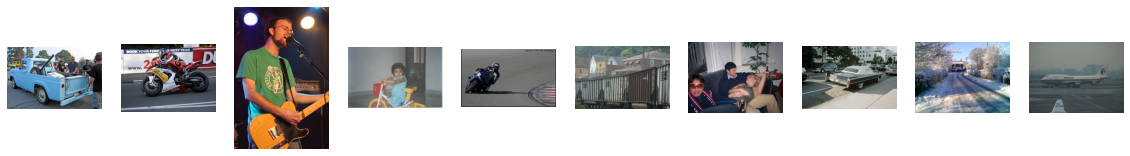

In [11]:
def get_general_light_images(df, image_paths):
    """
    parameters:
        df: (dataframe) -- columns(R, G, B)
        image_paths: (list) -- path contaning image file paths
    
    return:
        None
    """
    _mean_ = np.mean(df.R)
    general_light_images_indexs = np.array(df.R[np.logical_and(df.R>=(_mean_-20),df.R<=(_mean_+20))].index)
    np.random.seed(7)
    np.random.shuffle(general_light_images_indexs)
    fig = plt.figure(figsize=(20, 5))
    i = 1
    for image_path_index in general_light_images_indexs:
        ax = fig.add_subplot(1,10,i)
        ax.imshow(plt.imread(image_paths[image_path_index]))
        ax.axis('off')
        i = i + 1
        if(i==11): break
get_general_light_images(image_channels_average_pixel_matrix_df, the_500_image_filepaths)